In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [10]:
#load your dataset
file_path = r"C:\Users\youse\Desktop\ML Project\Salary Prediction\archive (2)\HR_Analytics.csv"
df = pd.read_csv(file_path)
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [11]:
# Extract features and target
feature_names = ['Education', 'JobLevel', 'Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
               'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
               'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
               'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsSinceLastPromotion', 'YearsWithCurrManager']

X = df[feature_names]  # Features (features matrix)
y = df['MonthlyIncome']  # Target (target vector)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the features matrix and target vector
print("Features Matrix (X) shape:", X.shape)
print("Target Vector (y) shape:", y.shape)


Features Matrix (X) shape: (1480, 21)
Target Vector (y) shape: (1480,)


In [12]:

# Display the first few rows of the features matrix and target vector
print("\nFirst few rows of Features Matrix (X):\n", X.head())
print("\nFirst few rows of Target Vector (y):\n", y.head())


First few rows of Features Matrix (X):
    Education  JobLevel  Age  DailyRate  DistanceFromHome  \
0          3         1   18        230                 3   
1          3         1   18        812                10   
2          3         1   18       1306                 5   
3          2         1   18        287                 5   
4          1         1   18        247                 8   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobSatisfaction  \
0                        3          54               3                3   
1                        4          69               2                3   
2                        2          69               3                2   
3                        2          73               3                4   
4                        3          80               3                3   

   NumCompaniesWorked  ...  PerformanceRating  RelationshipSatisfaction  \
0                   1  ...                  3                         3 

In [23]:
df.shape

(1423, 38)

In [14]:
#Searching for non values
missing_values = df.isnull().sum()
print(missing_values)

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [15]:
#Remove Any Non Values
df = df.dropna(how = 'any')
df.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [16]:
df.shape

(1423, 38)

In [25]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [17]:
# Extract features and target
feature_names = ['Education', 'JobLevel', 'Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
               'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
               'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
               'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsSinceLastPromotion', 'YearsWithCurrManager']

X = df[feature_names]  # Features (features matrix)
y = df['MonthlyIncome']  # Target (target vector)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.9113975973010827


In [19]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 1952469.4326430492
Coefficients: [ 3.01787666e+00  3.77660040e+03 -1.31486468e+01 -1.47988413e-02
 -1.53520068e+01 -1.96724884e+01  2.29019915e+00  2.71912115e+00
  1.69563990e+01  6.84432591e+00  1.72383302e+01 -6.00514943e+01
  7.59016678e+00 -3.63581623e+01  6.73228911e+01  6.60579239e+00
  2.83712508e+01  6.15460950e+00 -6.00528017e+00  1.12321098e+01
 -5.74051073e+01]
Intercept: -1593.0501852464904


In [20]:
import numpy as np
# Assuming y_test is your actual target variable values and predictions is the predicted values
mse = mean_squared_error(y_test, predictions)

# Calculate the variance of the target variable
variance = np.var(y_test)

# Compare MSE to the variance
print(f'Mean Squared Error: {mse}')
print(f'Variance of the Target Variable: {variance}')

# Assess the relationship
if mse < variance:
    print("The model is providing reasonable predictions.")
else:
    print("The model may not be capturing important patterns in the data.")


Mean Squared Error: 1952469.4326430492
Variance of the Target Variable: 22036303.45418283
The model is providing reasonable predictions.


In [21]:
# Check the scale of the target variable
target_range = np.max(y) - np.min(y)
print(f'Range of Target Variable: {target_range}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate Mean Percentage Error
percentage_error = np.mean(np.abs(predictions - y_test) / y_test) * 100
print(f'Mean Percentage Error: {percentage_error}%')

Range of Target Variable: 18990
Root Mean Squared Error: 1397.307923345119
Mean Percentage Error: 20.54071048450022%


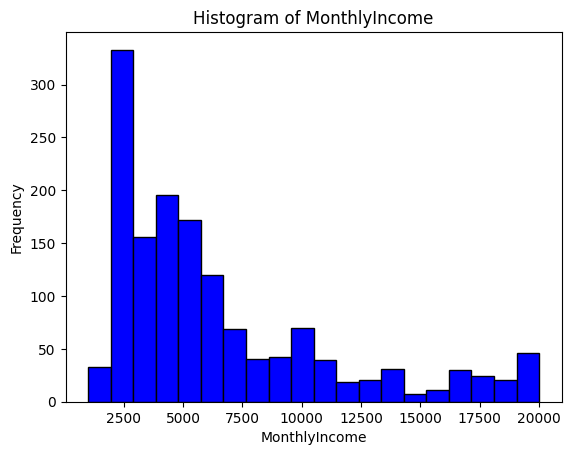

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the target variable
plt.hist(df[target_variable], bins=20, color='blue', edgecolor='black')
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.title(f'Histogram of {target_variable}')
plt.show()


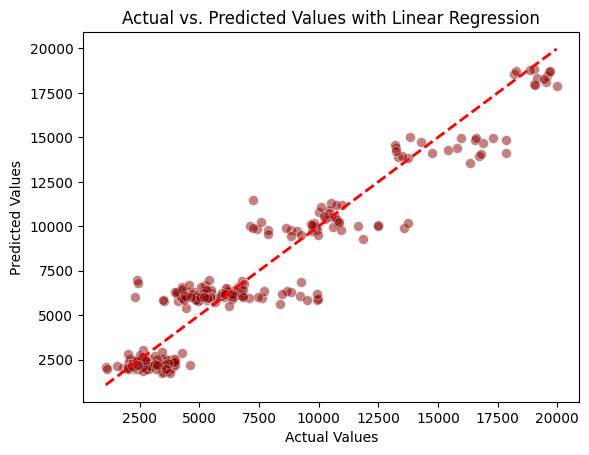

In [ ]:
# Make the scatter plot with larger and more transparent circles in dark red
plt.scatter(y_test, predictions, s=50, alpha=0.5, edgecolors='w', linewidth=0.5, color='darkred')

# Plot the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Set labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Linear Regression")

# Show the plot
plt.show()

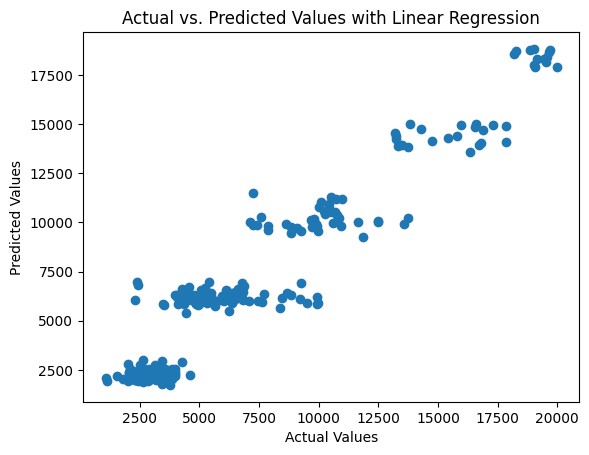

In [ ]:
# Make predictions on the testing set
predictions = reg.predict(X_test)

# Visualize the results
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Linear Regression")
plt.show()